In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

static_test_data_diag = pd.read_csv('C:\Google NEU\DS5500 Applications in Data Science\Project\github\data\static_test_data_diag.csv')
static_train_data_diag = pd.read_csv('C:\Google NEU\DS5500 Applications in Data Science\Project\github\data\static_train_data_diag.csv')
static_val_data_diag = pd.read_csv('C:\Google NEU\DS5500 Applications in Data Science\Project\github\data\static_val_data_diag.csv')

Columns names

In [2]:
diagnoses_cats_str = ['cardio', 'infection', 'brain', 'mental', 'gastro', 'trauma', 'respiratory', 'organ', 'blood', 'acute',
                  'failure', 'cancer', 'back', 'bone', 'pain']


Filter for each flag

In [3]:
cardio = static_train_data_diag[static_train_data_diag['cardio'] == 1]
infection = static_train_data_diag[static_train_data_diag['infection'] == 1]
brain = static_train_data_diag[static_train_data_diag['brain'] == 1]
mental = static_train_data_diag[static_train_data_diag['mental'] == 1]
gastro = static_train_data_diag[static_train_data_diag['gastro'] == 1]
trauma = static_train_data_diag[static_train_data_diag['trauma'] == 1]
respiratory = static_train_data_diag[static_train_data_diag['respiratory'] == 1]
organ = static_train_data_diag[static_train_data_diag['organ'] == 1]
blood = static_train_data_diag[static_train_data_diag['blood'] == 1]
acute = static_train_data_diag[static_train_data_diag['acute'] == 1]
failure = static_train_data_diag[static_train_data_diag['failure'] == 1]
cancer = static_train_data_diag[static_train_data_diag['cancer'] == 1]
back = static_train_data_diag[static_train_data_diag['back'] == 1]
bone = static_train_data_diag[static_train_data_diag['bone'] == 1]
pain = static_train_data_diag[static_train_data_diag['pain'] == 1]
other = static_train_data_diag[static_train_data_diag['other'] == 1]

diagnoses_cats = [cardio, infection, brain, mental, gastro, trauma, respiratory, organ, blood, acute,
                  failure, cancer, back, bone, pain]


Get summary stats for all and put in a dataframe

In [4]:
stats = pd.DataFrame(columns = diagnoses_cats_str)
for i in range(len(diagnoses_cats)):
    stats[diagnoses_cats_str[i]] = diagnoses_cats[i].days_until_death.describe()

#add in median row

median = pd.DataFrame(columns = diagnoses_cats_str, index=['median'])
for i in range(len(diagnoses_cats)):
    median[diagnoses_cats_str[i]] = diagnoses_cats[i].days_until_death.median()

#append the median

stats = stats.append(median.loc['median'], ignore_index=False)

In [5]:
stats = stats.transpose()
stats = stats.reset_index()

Plots

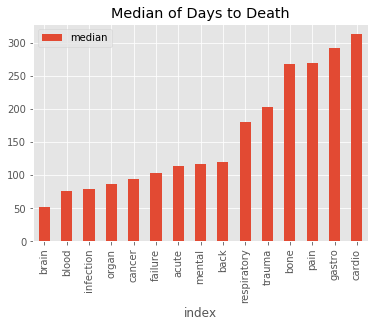

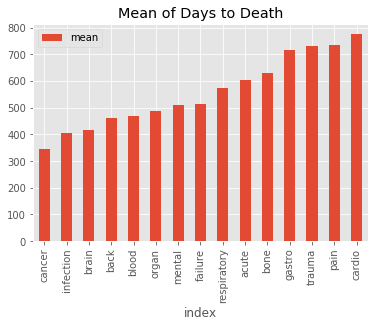

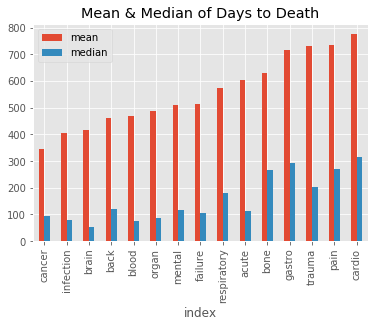

In [6]:
#plot

plt.style.use('ggplot')
plt.close('all')

stats = stats.sort_values('median')
median_plot = stats.plot.bar(x = 'index', y = 'median', title = 'Median of Days to Death')
plt.show()

stats = stats.sort_values('mean')
mean_plot = stats.plot.bar(x = 'index', y = 'mean', title = 'Mean of Days to Death')
plt.show()

mm_plot = stats.plot.bar(x = 'index', y = ['mean', 'median'], title = 'Mean & Median of Days to Death')
plt.show()


Of those that died in the hospital

In [7]:

#of those that die in the hospital

cardio_hosp = static_train_data_diag[(static_train_data_diag['cardio'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
infection_hosp = static_train_data_diag[(static_train_data_diag['infection'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
brain_hosp = static_train_data_diag[(static_train_data_diag['brain'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
mental_hosp = static_train_data_diag[(static_train_data_diag['mental'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
gastro_hosp = static_train_data_diag[(static_train_data_diag['gastro'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
trauma_hosp = static_train_data_diag[(static_train_data_diag['trauma'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
respiratory_hosp = static_train_data_diag[(static_train_data_diag['respiratory'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
organ_hosp = static_train_data_diag[(static_train_data_diag['organ'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
blood_hosp = static_train_data_diag[(static_train_data_diag['blood'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
acute_hosp = static_train_data_diag[(static_train_data_diag['acute'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
failure_hosp = static_train_data_diag[(static_train_data_diag['failure'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
cancer_hosp = static_train_data_diag[(static_train_data_diag['cancer'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
back_hosp = static_train_data_diag[(static_train_data_diag['back'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
bone_hosp = static_train_data_diag[(static_train_data_diag['bone'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
pain_hosp = static_train_data_diag[(static_train_data_diag['pain'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]
other_hosp = static_train_data_diag[(static_train_data_diag['other'] == 1) & (static_train_data_diag['hospital_expire_flag'] == 1)]

diagnoses_cats_hosp = [cardio_hosp, infection_hosp, brain_hosp, mental_hosp, gastro_hosp, trauma_hosp, respiratory_hosp, organ_hosp, blood_hosp, acute_hosp,
                  failure_hosp, cancer_hosp, back_hosp, bone_hosp, pain_hosp]

In [8]:
stats_hosp = pd.DataFrame(columns = diagnoses_cats_str)
for i in range(len(diagnoses_cats_hosp)):
    stats_hosp[diagnoses_cats_str[i]] = diagnoses_cats_hosp[i].days_until_death.describe()

#add in median row

median_hosp = pd.DataFrame(columns = diagnoses_cats_str, index=['median'])
for i in range(len(diagnoses_cats_hosp)):
    median_hosp[diagnoses_cats_str[i]] = diagnoses_cats_hosp[i].days_until_death.median()

# append the median

stats_hosp = stats_hosp.append(median_hosp.loc['median'], ignore_index=False)

In [9]:
stats_hosp = stats_hosp.transpose()
stats_hosp = stats_hosp.reset_index()

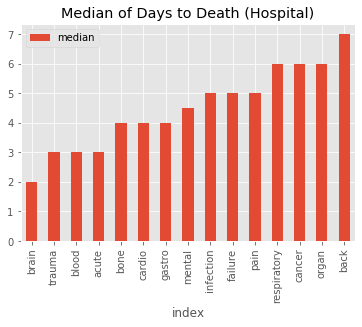

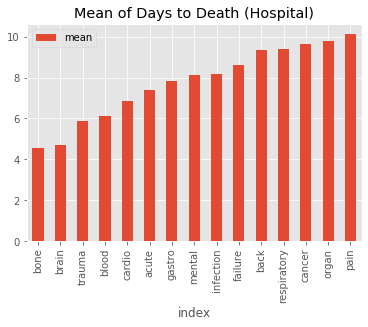

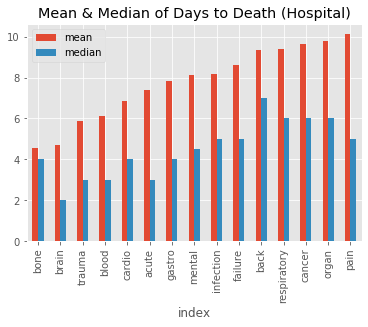

In [11]:
stats_hosp = stats_hosp.sort_values('median')
median_hosp_plot = stats_hosp.plot.bar(x = 'index', y = 'median', title = 'Median of Days to Death (Hospital)')
plt.show()

stats_hosp = stats_hosp.sort_values('mean')
mean_hosp_plot = stats_hosp.plot.bar(x = 'index', y = 'mean', title = 'Mean of Days to Death (Hospital)')
plt.show()

mm_hosp_plot = stats_hosp.plot.bar(x = 'index', y = ['mean', 'median'], title = 'Mean & Median of Days to Death (Hospital)')
plt.show()